In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras_text_summarization.library.utility.plot_utils import plot_and_save_history
from keras_text_summarization.library.rnn import OneShotRNN
from keras_text_summarization.library.applications.fake_news_loader import fit_text
import numpy as np
import pickle

/home1/e1-246-17/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
LOAD_EXISTING_WEIGHTS = False

In [3]:
np.random.seed(42)
data_dir_path = './data'
report_dir_path = './reports'
model_dir_path = './models/oneshotrnn'

#print('loading csv file ...')
df = pd.read_csv(data_dir_path + "/news_summary.csv", encoding='latin1')

In [4]:
with open("amazon_texts_less", "rb") as fp:
    cl_txt = pickle.load(fp)
with open("amazon_summaries_less", "rb") as fp2:
    cl_summ = pickle.load(fp2)

In [5]:
Y = cl_summ
X = cl_txt

In [6]:
config = fit_text(X, Y)

In [7]:
summarizer = OneShotRNN(config)

max_input_seq_length 30
max_target_seq_length 8
num_input_tokens 6002
num_target_tokens 2501


In [7]:
if LOAD_EXISTING_WEIGHTS:
    weight_file_path = OneShotRNN.get_weight_file_path(model_dir_path=model_dir_path)
    summarizer.load_weights(weight_file_path=weight_file_path)

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
print('training size: ', len(Xtrain))
print('testing size: ', len(Xtest))

training size:  16803
testing size:  4201


In [10]:
history = summarizer.fit(Xtrain, Ytrain, Xtest, Ytest, epochs=100, batch_size=128, model_dir_path=model_dir_path)

(16803,)
(4201,)
(16803, 30)
(4201, 30)
Epoch 1/100
131/131 [==============================] - 17s 131ms/step - loss: 4.6211 - acc: 0.1925 - val_loss: 4.1807 - val_acc: 0.2288
Epoch 2/100
131/131 [==============================] - 15s 113ms/step - loss: 4.0683 - acc: 0.2291 - val_loss: 3.9908 - val_acc: 0.2288
Epoch 3/100
131/131 [==============================] - 15s 115ms/step - loss: 3.9294 - acc: 0.2291 - val_loss: 3.8900 - val_acc: 0.2288
Epoch 4/100
131/131 [==============================] - 14s 110ms/step - loss: 3.8484 - acc: 0.2302 - val_loss: 3.8260 - val_acc: 0.2305
Epoch 5/100
131/131 [==============================] - 14s 106ms/step - loss: 3.7949 - acc: 0.2341 - val_loss: 3.7820 - val_acc: 0.2337
Epoch 6/100
131/131 [==============================] - 14s 105ms/step - loss: 3.7572 - acc: 0.2373 - val_loss: 3.7498 - val_acc: 0.2337
Epoch 7/100
131/131 [==============================] - 14s 107ms/step - loss: 3.7285 - acc: 0.2379 - val_loss: 3.7258 - val_acc: 0.2337
Epoch 8/

131/131 [==============================] - 14s 107ms/step - loss: 3.5364 - acc: 0.2609 - val_loss: 3.5710 - val_acc: 0.2623
Epoch 61/100
131/131 [==============================] - 14s 104ms/step - loss: 3.5354 - acc: 0.2610 - val_loss: 3.5698 - val_acc: 0.2623
Epoch 62/100
131/131 [==============================] - 13s 102ms/step - loss: 3.5344 - acc: 0.2609 - val_loss: 3.5693 - val_acc: 0.2623
Epoch 63/100
131/131 [==============================] - 14s 110ms/step - loss: 3.5335 - acc: 0.2610 - val_loss: 3.5690 - val_acc: 0.2623
Epoch 64/100
131/131 [==============================] - 14s 108ms/step - loss: 3.5326 - acc: 0.2610 - val_loss: 3.5683 - val_acc: 0.2623
Epoch 65/100
131/131 [==============================] - 14s 105ms/step - loss: 3.5319 - acc: 0.2611 - val_loss: 3.5680 - val_acc: 0.2623
Epoch 66/100
131/131 [==============================] - 14s 110ms/step - loss: 3.5309 - acc: 0.2611 - val_loss: 3.5674 - val_acc: 0.2623
Epoch 67/100
131/131 [==============================] 

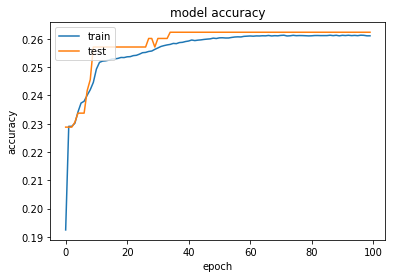

In [11]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('oneshot_acc')

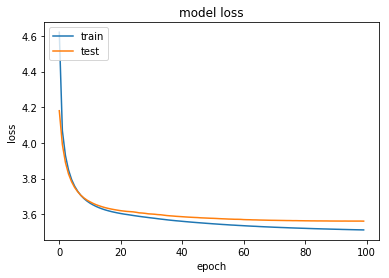

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('oneshot_loss')
#plt.show()

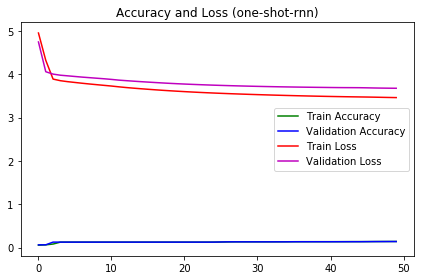

In [11]:
history_plot_file_path = report_dir_path + '/' + OneShotRNN.model_name + '-history.png'
if LOAD_EXISTING_WEIGHTS:
    history_plot_file_path = report_dir_path + '/' + OneShotRNN.model_name + '-history-v' + str(summarizer.version) + '.png'
plot_and_save_history(history, summarizer.model_name, history_plot_file_path, metrics={'loss', 'acc'})